# **Savvy Coders Capstone Project**
# **Electric Vehicle Charging Station Infastructure Ramp Up**
### *Completed by Eric Bast*

## Project Goals
1. See how the electric vehicle(EV) charging station infastructure is developing in the United States. 
2. Compare the different charging station companies to determine which ones are developing faster
3. Create visualizations and interactive charts to see growth patterns
4. Develop a trend line to make predictions on the next 5 years of growth 

## Hypothesis and Approach
1. What is the question?

    *The question I chose was "How is the electric vehicle charging infastructure developing in the United stated and can we project the future of that development"*
    
2. Data Set
    *There are 3 data sets that I will be using to answer the question above*
    *The first is from the US Department of Energy- Alternative Fuels Data Center. https://afdc.energy.gov/fuels/electricity-locations#/find/nearest?fuel=ELEC*
    *The second is from Kaggle and will be used to verify the data from the first dataset. https://www.kaggle.com/datasets/omarsobhy14/supercharge-locations*
    *The third is also from the US Department of Energy. I use it to determine a trend line for EV sales in the US. https://afdc.energy.gov/data/10567

3. Data Manipulation (Tools used to complete project)
    -Python (Pandas)
    -Python (Numpy)
    -Jupyter Notebooks
    -Excel

4. Coding Process 
    -Python
    -VS Code

5. Visualizations
    -Python (Matplotlib)
    -Tableau

In [21]:
#Importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing Dataset
#EVChargers = pd.read_csv('C:\Users\jedim\code\savvycoders\capstone\CleanedEVStations.csv', index_col = 0)
#Had a syntax error for this line. 
#Researched to find that "read_csv" wants forward slashes.
EVChargers = pd.read_csv('C:/Users/jedim/code/savvycoders/capstone/CleanedEVStations1.csv', index_col = 0)

#Checking integrity of imported file
#EVChargers.info()

#Starting the cleaning and wrangling process

#Dropping Null Values to shrink dataset
#noNullCol = EVChargers.dropna()
#This command deleted all of the rows since they all contained some null values. Will need a different command
noNullCol = EVChargers.dropna(axis=1, how='all')
#noNullCol.info()

#Removing columns that have only partial data that isnt needed
NoPartCol = noNullCol.dropna(axis=1, thresh=64000)
NoPartCol.info()
NoPartCol.to_csv("CleanedEVStations1.csv", index = False)


C:\Users\jedim\AppData\Local\Temp\ipykernel_62304\3351647699.py:10: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  EVChargers = pd.read_csv('C:/Users/jedim/code/savvycoders/capstone/CleanedEVStations1.csv', index_col = 0)


<class 'pandas.core.frame.DataFrame'>
Index: 64283 entries, Los Angeles to Watertown
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   State                             64283 non-null  object 
 1   ZIP                               64280 non-null  object 
 2   Status Code                       64283 non-null  object 
 3   Groups With Access Code           64283 non-null  object 
 4   EV Network                        64283 non-null  object 
 5   Geocode Status                    64283 non-null  object 
 6   Latitude                          64283 non-null  float64
 7   Longitude                         64283 non-null  float64
 8   Date Last Confirmed               64090 non-null  object 
 9   ID                                64283 non-null  int64  
 10  Updated At                        64283 non-null  object 
 11  Open_Date                         64235 non-null  object 


C:\Users\jedim\AppData\Local\Temp\ipykernel_62304\195208376.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/jedim/code/savvycoders/capstone/CleanedEVStations1.csv")


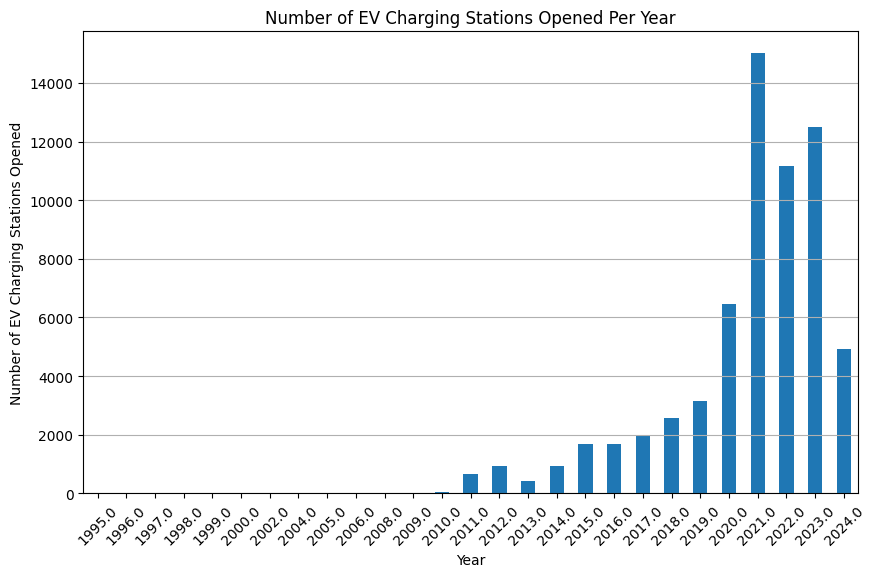

In [32]:
# Starting to build a visual to test data importing

# import cleaned data from csv into data frame 
df = pd.read_csv("C:/Users/jedim/code/savvycoders/capstone/CleanedEVStations1.csv")

# Checking to see if DateFrame is loaded properly
#print(df)

# Convert 'Open_Date' to datetime
df['Open_Date'] = pd.to_datetime(df['Open_Date'], errors='coerce')

# Extract the year from 'Open_Date'
df['Year_Opened'] = df['Open_Date'].dt.year

# Count the number of stations opened each year
yearly_counts = df['Year_Opened'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of EV Charging Stations Opened')
plt.title('Number of EV Charging Stations Opened Per Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



<Figure size 1200x800 with 0 Axes>

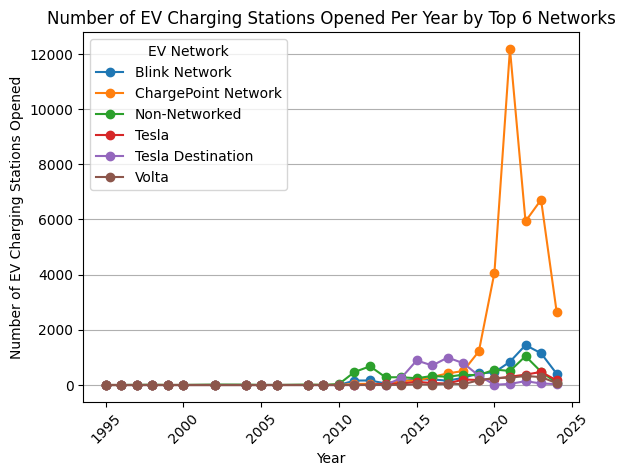

: 

In [38]:
# Identify the top 6 EV networks based on the number of stations
top_networks = df['EV_Network'].value_counts().nlargest(6).index

# Filter the data for these networks
filtered_df = df[df['EV_Network'].isin(top_networks)]

# Aggregate the yearly data for each network
network_yearly_counts = filtered_df.groupby(['Year_Opened','EV_Network']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(12, 8))
network_yearly_counts.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of EV Charging Stations Opened')
plt.title('Number of EV Charging Stations Opened Per Year by Top 6 Networks')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='EV Network')
plt.show()

<Figure size 1200x800 with 0 Axes>

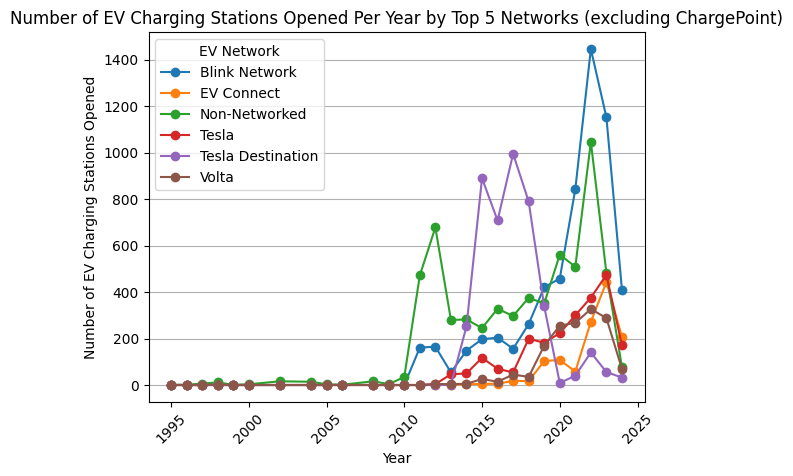

In [37]:
# Graph above was unreadable due to high values of Charge Points return counts. Decided to remove thier caount to make a more visually appealing graph
 
topNetworksNoCP = df['EV_Network'].value_counts().nlargest(7).drop('ChargePoint Network').index[:6]

# Filter the data for these networks
filteredDF_NoCP = df[df['EV_Network'].isin(topNetworksNoCP)]

# Counting the yearly data for each network
yearlyCount_NoCP = filteredDF_NoCP.groupby(['Year_Opened', 'EV_Network']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(12, 8))
yearlyCount_NoCP.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of EV Charging Stations Opened')
plt.title('Number of EV Charging Stations Opened Per Year by Top 5 Networks (excluding ChargePoint)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='EV Network')
plt.show()